In [34]:
import pandas as pd
import numpy as np
from feature_engineering import two_point_haversine
from joblib import load
from geoplotting import create_geoplot

In [2]:
df = pd.read_pickle('boosted_dataset.pkl')

In [3]:
df.head()

,c_street_number,c_street,c_unit,c_city,c_state,c_zip_code,g_county,lat,lon,adj_address,dist_to_downtown,min_dist_to_transport,price_per_sqft,price,sqft,bathrooms,bedrooms,price_per_bed
1,12200,PRATOLINA DRIVE,NaN,AUSTIN,TX,78739,Travis County,30.186914,-97.928031,12200 PRATOLINA DRIVEAUSTIN TX 78739,20.553532,3.156990,166.627493,499650.759637,2998.609359,3.424194,4,124912.689909
3,15302,DOROTHY DRIVE,NaN,AUSTIN,TX,78734,Travis County,30.352751,-97.956798,15302 DOROTHY DRIVEAUSTIN TX 78734,23.717263,11.432891,208.288155,732390.079922,3516.234899,3.961483,4,183097.519980
4,2515,DREW LANE,NaN,AUSTIN,TX,78748,Travis County,30.169753,-97.833187,2515 DREW LANEAUSTIN TX 78748,13.735147,0.719679,180.158106,605314.822569,3359.908897,3.594583,4,151328.705642
5,15404,JOSEPH DRIVE,NaN,AUSTIN,TX,78734,Travis County,30.354369,-97.957800,15404 JOSEPH DRIVEAUSTIN TX 78734,23.884909,11.240021,208.288155,727934.284355,3494.842441,3.848244,4,181983.571089
7,11203,RANCH ROAD 2222,1001,AUSTIN,TX,78730,Travis County,30.399156,-97.851646,11203 RANCH ROAD 2222AUSTIN TX 78730,18.323480,0.736829,274.161822,826098.731716,3013.179316,3.018958,3,275366.243905


In [7]:
centroids = load('centroids.joblib')

In [9]:
centroids

array([[ 30.30827251, -97.76838252],
       [ 30.20822444, -97.88963065],
       [ 30.29029017, -97.69658718],
       [ 30.32982475, -97.94793633],
       [ 30.42536195, -97.70199518],
       [ 30.16778669, -97.75813381],
       [ 30.17873301, -97.65222962],
       [ 30.27384007, -97.84465694],
       [ 30.36967309, -97.65088312],
       [ 30.41836662, -97.79143731],
       [ 30.17792866, -97.82770991],
       [ 30.37000573, -97.88948635],
       [ 30.2356973 , -97.76700697],
       [ 30.24966823, -97.59102806],
       [ 30.35403896, -97.73285214]])

In [14]:
tups = [tuple(x) for x in centroids]
subs = df[['lat', 'lon']]
tuples = [tuple(x) for x in subs.values]
min_centroid_dist = [min([two_point_haversine(centroid, address) for centroid in tups]) for address in tuples]

In [17]:
df['min_centroid_dist'] = min_centroid_dist

In [26]:
x_min = df['min_centroid_dist'].min()
x_max = df['min_centroid_dist'].max()
df['norm_centroid'] = df['min_centroid_dist'].map(lambda x: 1 - ((x - x_min) / (x_max - x_min)))

In [27]:
x_min = df['min_dist_to_transport'].min()
x_max = df['min_dist_to_transport'].max()
df['norm_transport'] = df['min_dist_to_transport'].map(lambda x: 1 - ((x - x_min) / (x_max - x_min)))

In [28]:
x_min = df['price_per_bed'].min()
x_max = df['price_per_bed'].max()
df['norm_price_per_bed'] = df['price_per_bed'].map(lambda x: 1 - ((x - x_min) / (x_max - x_min)))

In [29]:
df['importance_ranking'] = df['norm_centroid'] + df['norm_transport'] + df['norm_price_per_bed']

In [31]:
importance_rankings = df[['lat', 'lon', 'importance_ranking']].sort_values(by='importance_ranking', ascending=False)

In [37]:
selected = importance_rankings.iloc[:100]

/Users/austinmadert/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


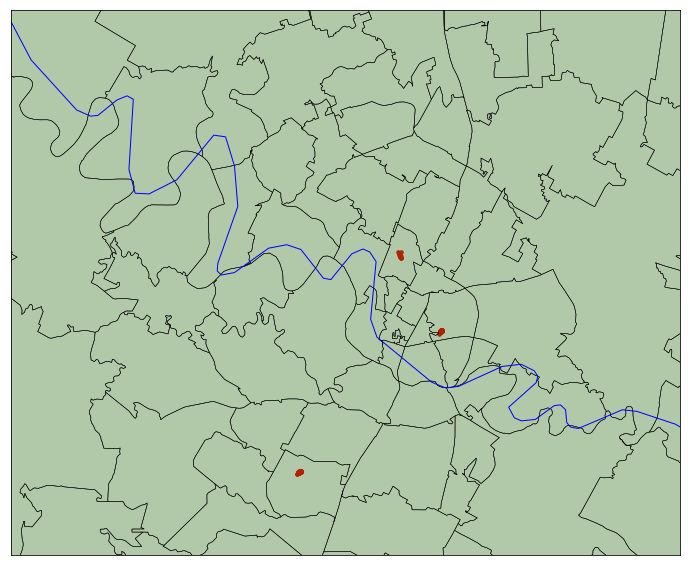

In [38]:
create_geoplot(selected, sample_data=False)